# 흡연여부에 따른 질병여부 비교

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

In [2]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)

In [3]:
#흡연상태 변환
def 흡연_변환(x):
    x=x['흡연상태']
    if x==1:
        return "비흡연자"
    elif x==2:
        return "구흡연자"
    elif x==3:
        return "흡연자"

검진정보["흡연상태"] = 검진정보.apply(흡연_변환,axis=1)

## 흡연상태에 따른 간질환 여부

In [4]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df

,흡연상태,성별,연령대,간질환,빈혈유무,BMI,비만정도,혈압,당뇨,혈청크레아티닌유무,신장질환,사람수,성별-연령대
0,구흡연자,남,40대,비정상,5139,5139,5139,5139,5139,5139,5139,5139,40대-남
1,구흡연자,남,40대,위험군,8623,8623,8623,8623,8623,8623,8623,8623,40대-남
2,구흡연자,남,40대,정상,35693,35693,35693,35693,35692,35693,35693,35693,40대-남
3,구흡연자,남,50대,비정상,5258,5258,5258,5258,5257,5258,5258,5258,50대-남
4,구흡연자,남,50대,위험군,7574,7574,7574,7574,7574,7574,7574,7574,50대-남
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,흡연자,여,70대,위험군,23,23,23,23,23,23,23,23,70대-여
86,흡연자,여,70대,정상,565,565,565,565,565,565,565,565,70대-여
87,흡연자,여,80대,비정상,2,2,2,2,2,2,2,2,80대-여
88,흡연자,여,80대,위험군,8,8,8,8,8,8,8,8,80대-여


In [5]:
# 흡연상태 - 간질환
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

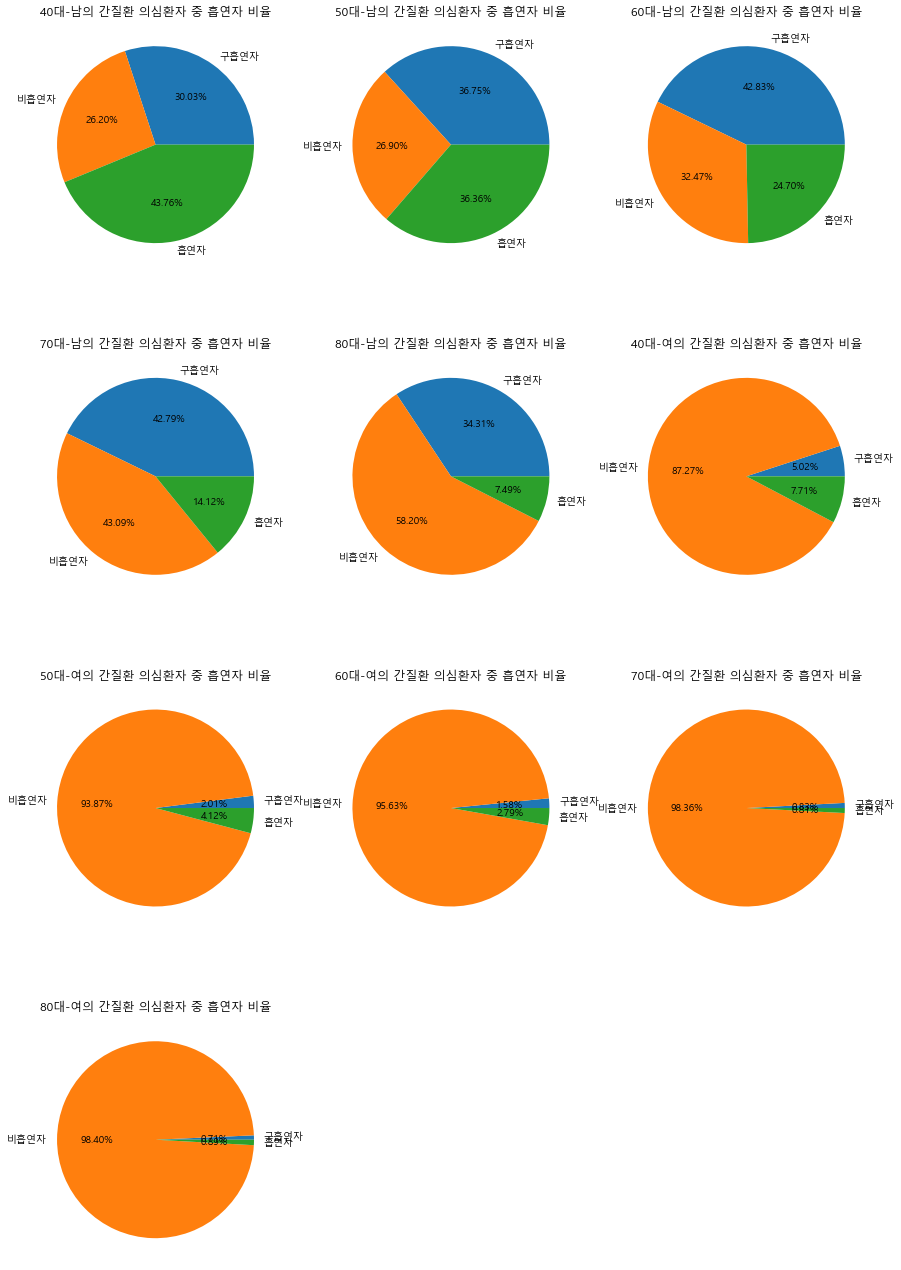

In [6]:
index = df[df['간질환']=='정상'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 간질환 의심환자 중 흡연자 비율')
    j += 1

plt.show()

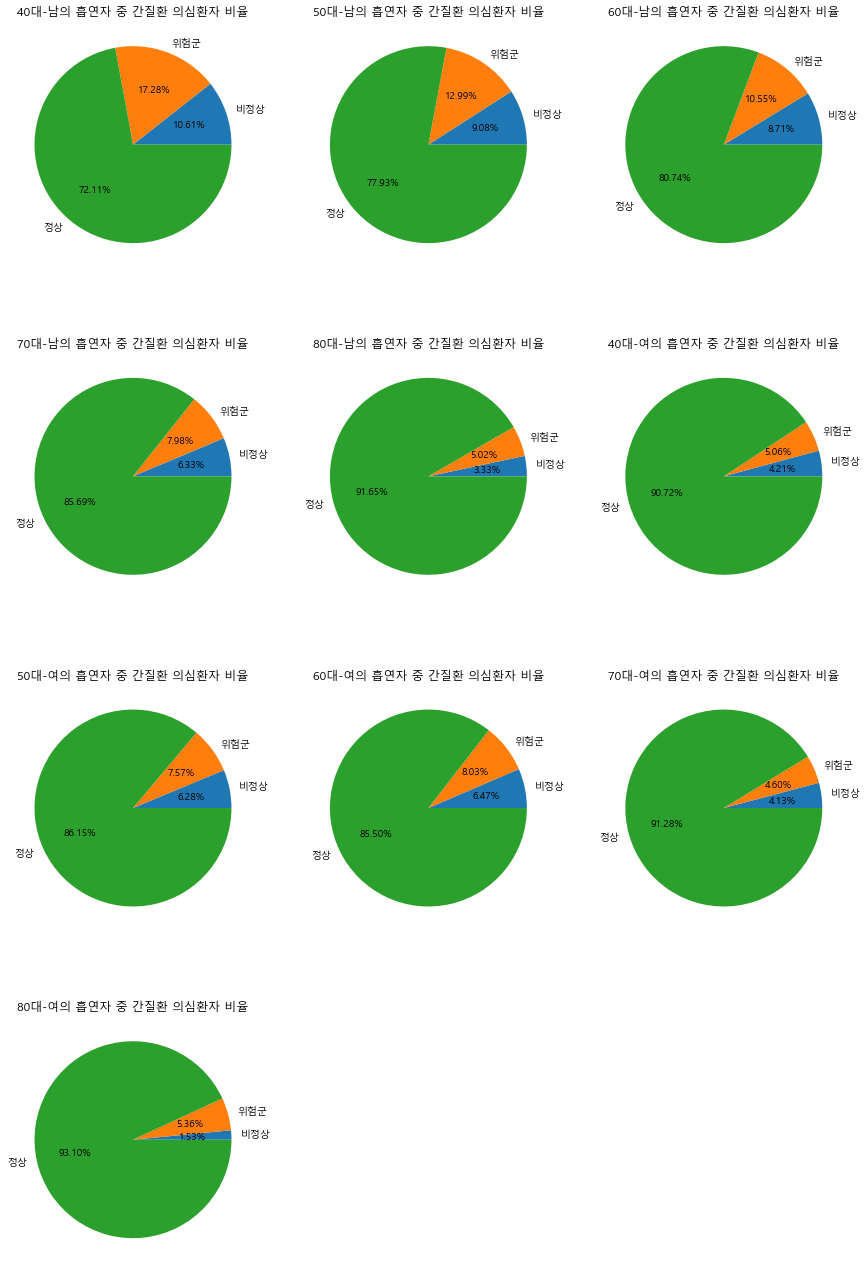

In [7]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['흡연상태']=='비흡연자'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 흡연자 중 간질환 의심환자 비율')
    j += 1

plt.show()

## 흡연상태에 따른 신장질환 여부

In [8]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "신장질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,흡연상태,성별,연령대,신장질환,빈혈유무,BMI,비만정도,혈압,당뇨,혈청크레아티닌유무,간질환,사람수,성별-연령대
0,구흡연자,남,40대,비정상,4223,4223,4223,4223,4223,4223,4223,4223,40대-남
1,구흡연자,남,40대,위험군,4838,4838,4838,4838,4838,4838,4838,4838,40대-남
2,구흡연자,남,40대,정상,40394,40394,40394,40394,40393,40394,40394,40394,40대-남
3,구흡연자,남,50대,비정상,4739,4739,4739,4739,4739,4739,4739,4739,50대-남
4,구흡연자,남,50대,위험군,6248,6248,6248,6248,6247,6248,6248,6248,50대-남
5,구흡연자,남,50대,정상,46558,46558,46558,46558,46557,46558,46558,46558,50대-남
6,구흡연자,남,60대,비정상,4275,4275,4275,4275,4275,4275,4275,4275,60대-남
7,구흡연자,남,60대,위험군,6115,6115,6115,6115,6115,6115,6115,6115,60대-남
8,구흡연자,남,60대,정상,36886,36886,36886,36886,36884,36886,36886,36886,60대-남
9,구흡연자,남,70대,비정상,2635,2635,2635,2635,2635,2635,2635,2635,70대-남


In [9]:
# 흡연상태 - 신장질환
# 신장질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('신장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

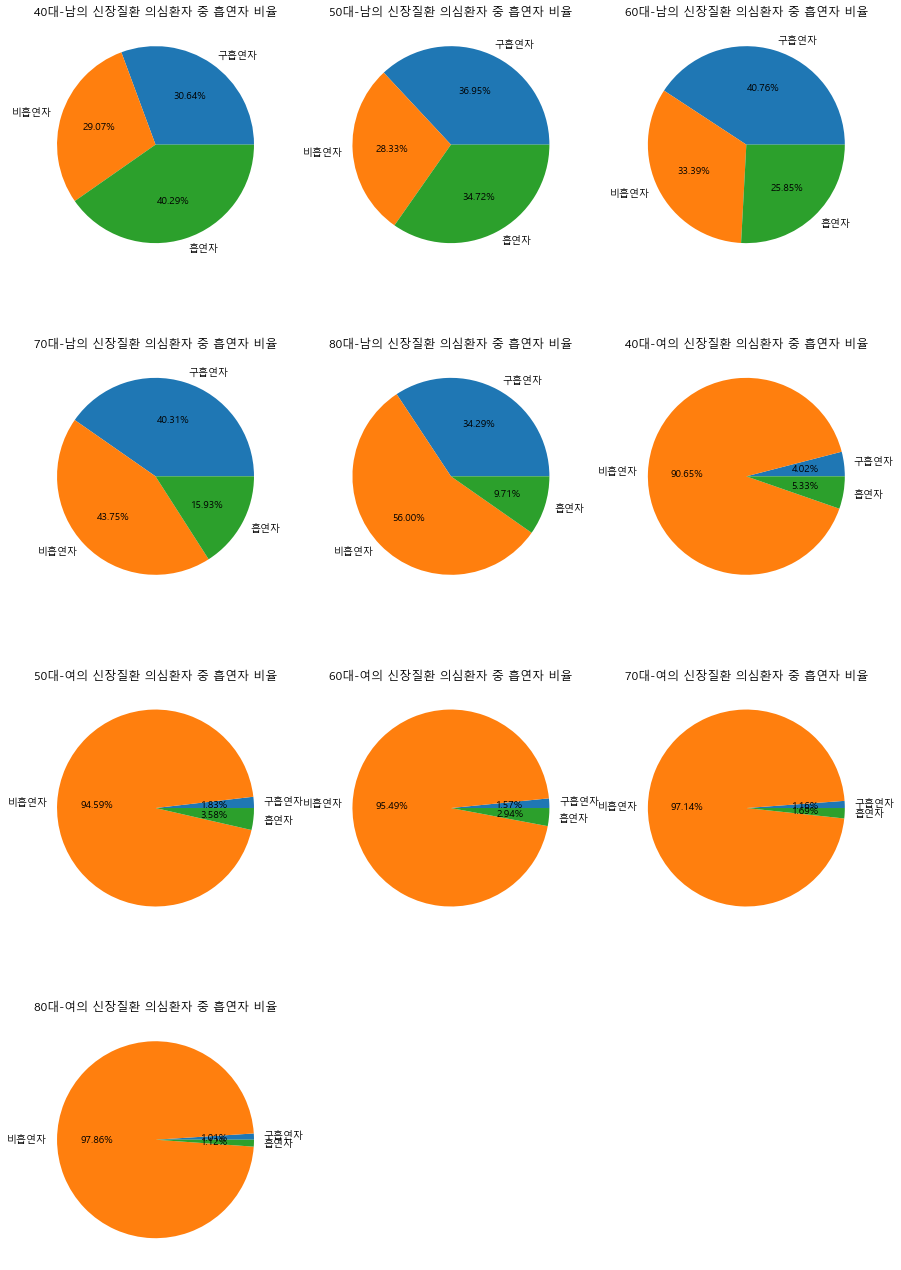

In [10]:
index = df[df['신장질환']=='정상'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 신장질환 의심환자 중 흡연자 비율')
    j += 1

plt.show()

## 흡연상태에 따른 빈혈 여부

In [11]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "빈혈유무"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,흡연상태,성별,연령대,빈혈유무,BMI,비만정도,혈압,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,구흡연자,남,40대,비정상,219,219,219,219,219,219,219,219,40대-남
1,구흡연자,남,40대,정상,49236,49236,49236,49235,49236,49236,49236,49236,40대-남
2,구흡연자,남,50대,비정상,424,424,424,424,424,424,424,424,50대-남
3,구흡연자,남,50대,정상,57121,57121,57121,57119,57121,57121,57121,57121,50대-남
4,구흡연자,남,60대,비정상,743,743,743,743,743,743,743,743,60대-남
5,구흡연자,남,60대,정상,46533,46533,46533,46531,46533,46533,46533,46533,60대-남
6,구흡연자,남,70대,비정상,937,937,937,937,937,937,937,937,70대-남
7,구흡연자,남,70대,정상,20291,20291,20291,20291,20291,20291,20291,20291,70대-남
8,구흡연자,남,80대,비정상,499,499,499,499,499,499,499,499,80대-남
9,구흡연자,남,80대,정상,3966,3966,3966,3966,3966,3966,3966,3966,80대-남


In [12]:
# 흡연상태 - 빈혈여부
# 빈혈여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('빈혈유무:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

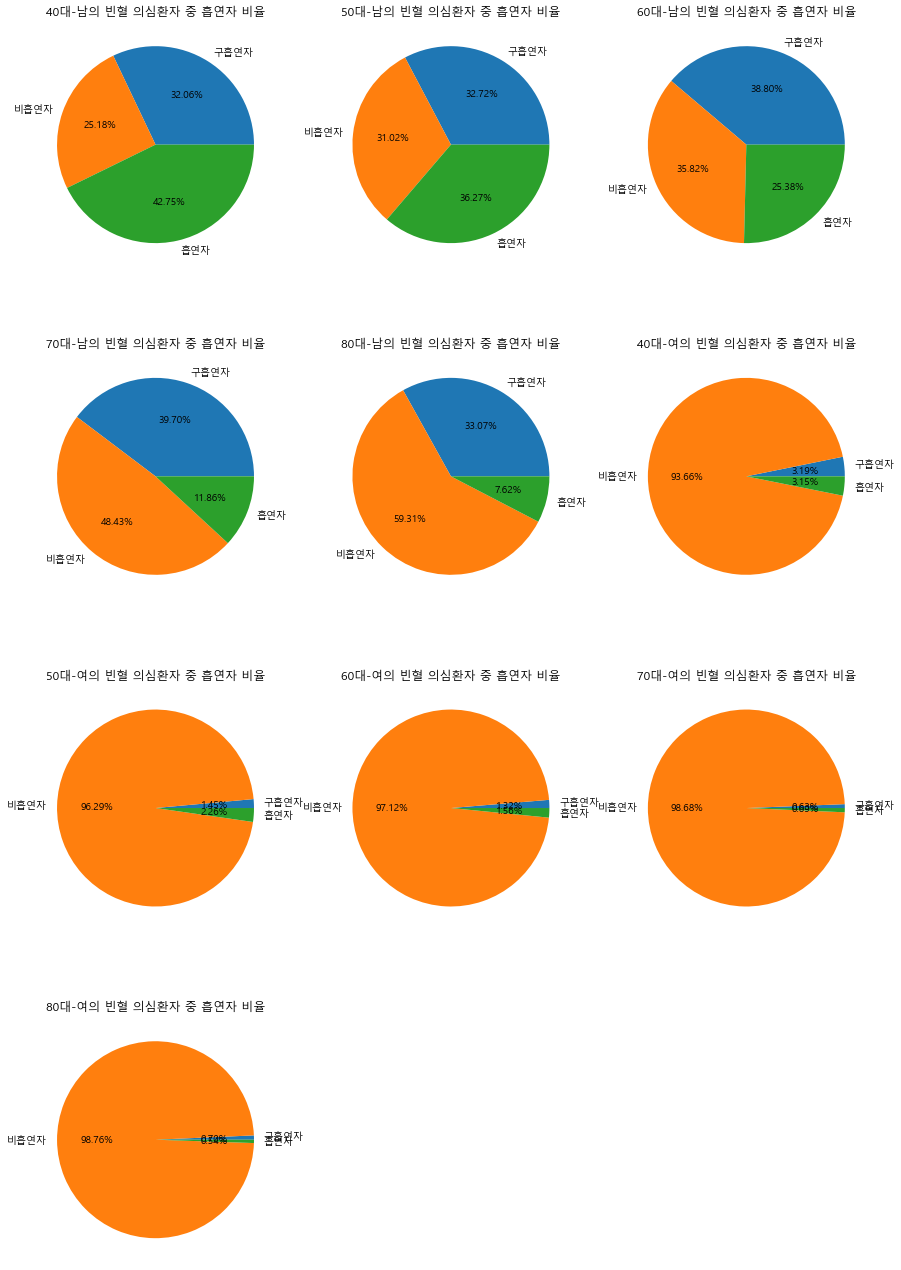

In [13]:
index = df[df['빈혈유무']=='정상'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 빈혈 의심환자 중 흡연자 비율')
    j += 1

plt.show()

## 흡연상태에 따른 비만 여부

In [14]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "비만정도"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,흡연상태,성별,연령대,비만정도,빈혈유무,BMI,혈압,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,구흡연자,남,40대,1단계 비만,21530,21530,21530,21529,21530,21530,21530,21530,40대-남
1,구흡연자,남,40대,2단계 비만,4223,4223,4223,4223,4223,4223,4223,4223,40대-남
2,구흡연자,남,40대,위험체중,11936,11936,11936,11936,11936,11936,11936,11936,40대-남
3,구흡연자,남,40대,저체중,455,455,455,455,455,455,455,455,40대-남
4,구흡연자,남,40대,정상,11311,11311,11311,11311,11311,11311,11311,11311,40대-남
5,구흡연자,남,50대,1단계 비만,25466,25466,25466,25464,25466,25466,25466,25466,50대-남
6,구흡연자,남,50대,2단계 비만,2960,2960,2960,2960,2960,2960,2960,2960,50대-남
7,구흡연자,남,50대,위험체중,14650,14650,14650,14650,14650,14650,14650,14650,50대-남
8,구흡연자,남,50대,저체중,564,564,564,564,564,564,564,564,50대-남
9,구흡연자,남,50대,정상,13905,13905,13905,13905,13905,13905,13905,13905,50대-남


In [15]:
# 흡연상태 - 비만여부
# 비만여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('비만정도:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#e377c2','#ff6f69', '#ffcc5c','#17becf'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

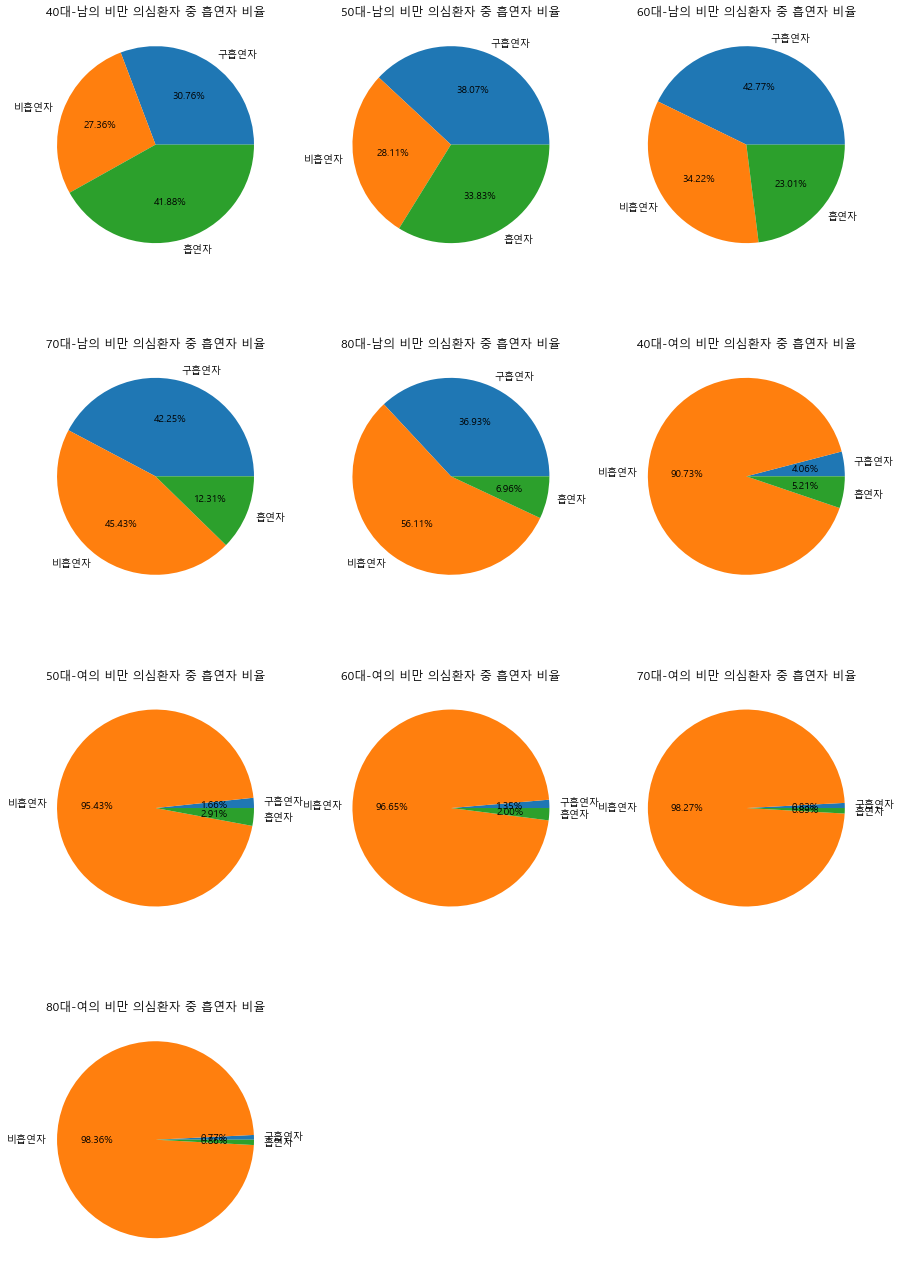

In [16]:
index = df[df['비만정도']=='정상'].index
df.drop(index, inplace=True)
index = df[df['비만정도']=='저체중'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 비만 의심환자 중 흡연자 비율')
    j += 1

plt.show()

## 흡연상태에 따른 당뇨병 여부

In [17]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,흡연상태,성별,연령대,당뇨,빈혈유무,BMI,비만정도,혈압,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,구흡연자,남,40대,공복혈당장애,18153,18153,18153,18153,18153,18153,18153,18153,40대-남
1,구흡연자,남,40대,당뇨병,3760,3760,3760,3760,3760,3760,3760,3760,40대-남
2,구흡연자,남,40대,정상,27541,27541,27541,27541,27541,27541,27541,27541,40대-남
3,구흡연자,남,50대,공복혈당장애,23620,23620,23620,23620,23620,23620,23620,23620,50대-남
4,구흡연자,남,50대,당뇨병,7808,7808,7808,7808,7808,7808,7808,7808,50대-남
5,구흡연자,남,50대,정상,26115,26115,26115,26115,26115,26115,26115,26115,50대-남
6,구흡연자,남,60대,공복혈당장애,19717,19717,19717,19717,19717,19717,19717,19717,60대-남
7,구흡연자,남,60대,당뇨병,8154,8154,8154,8154,8154,8154,8154,8154,60대-남
8,구흡연자,남,60대,정상,19403,19403,19403,19403,19403,19403,19403,19403,60대-남
9,구흡연자,남,70대,공복혈당장애,8866,8866,8866,8866,8866,8866,8866,8866,70대-남


In [18]:
# 흡연상태 - 당뇨여부
# 당뇨여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('당뇨:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

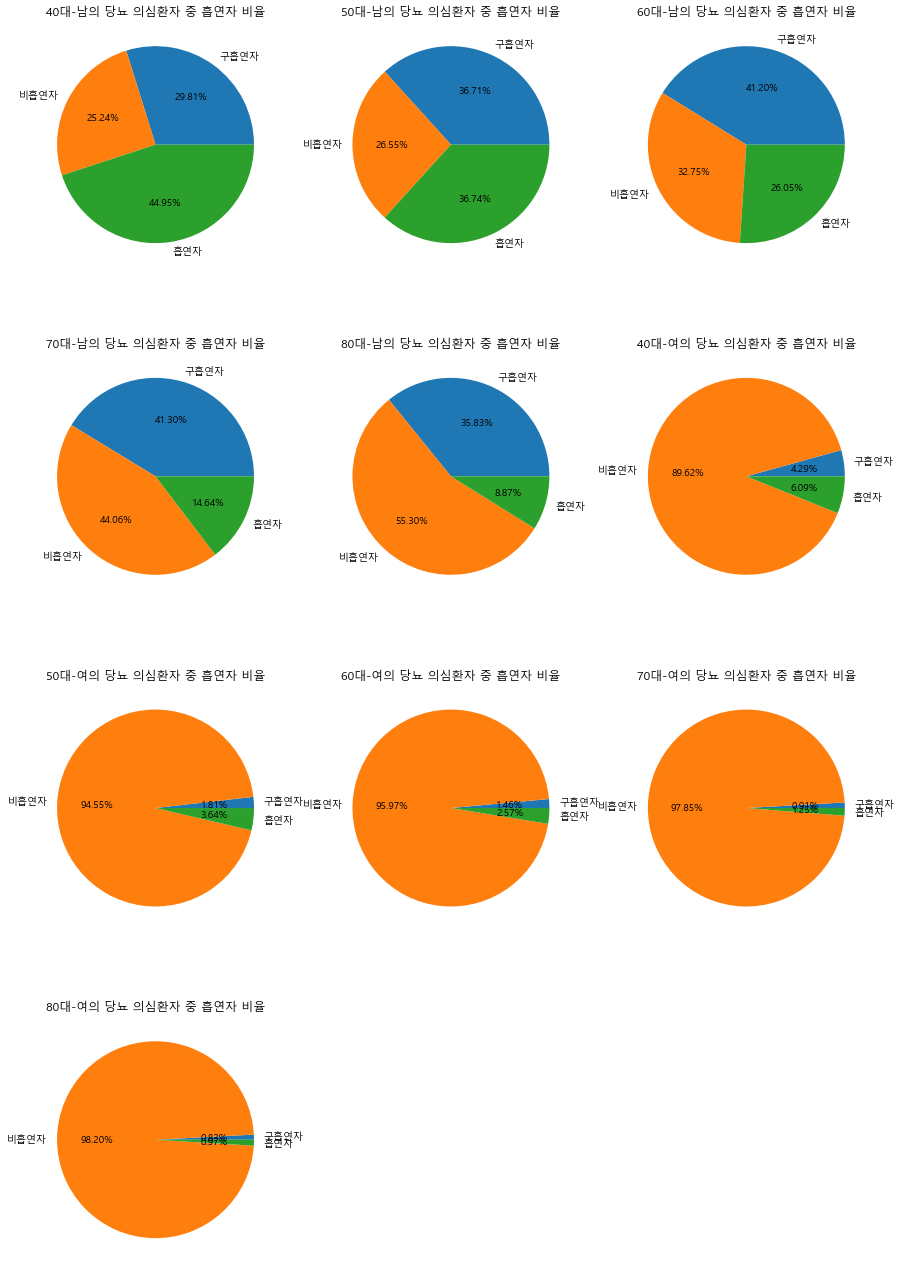

In [19]:
index = df[df['당뇨']=='정상'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 당뇨 의심환자 중 흡연자 비율')
    j += 1

plt.show()

## 흡연상태에 따른 고혈압 여부

In [20]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "혈압"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,흡연상태,성별,연령대,혈압,빈혈유무,BMI,비만정도,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,구흡연자,남,40대,고혈압,7727,7727,7727,7726,7727,7727,7727,7727,40대-남
1,구흡연자,남,40대,저혈압,131,131,131,131,131,131,131,131,40대-남
2,구흡연자,남,40대,정상혈압,41597,41597,41597,41597,41597,41597,41597,41597,40대-남
3,구흡연자,남,50대,고혈압,10216,10216,10216,10216,10216,10216,10216,10216,50대-남
4,구흡연자,남,50대,저혈압,185,185,185,185,185,185,185,185,50대-남
5,구흡연자,남,50대,정상혈압,47144,47144,47144,47142,47144,47144,47144,47144,50대-남
6,구흡연자,남,60대,고혈압,9879,9879,9879,9879,9879,9879,9879,9879,60대-남
7,구흡연자,남,60대,저혈압,142,142,142,142,142,142,142,142,60대-남
8,구흡연자,남,60대,정상혈압,37255,37255,37255,37253,37255,37255,37255,37255,60대-남
9,구흡연자,남,70대,고혈압,5446,5446,5446,5446,5446,5446,5446,5446,70대-남


In [21]:
# 흡연상태 - 고혈압여부
# 고혈압여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('혈압:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#e377c2','#ff6f69', '#17becf', '#ffcc5c'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

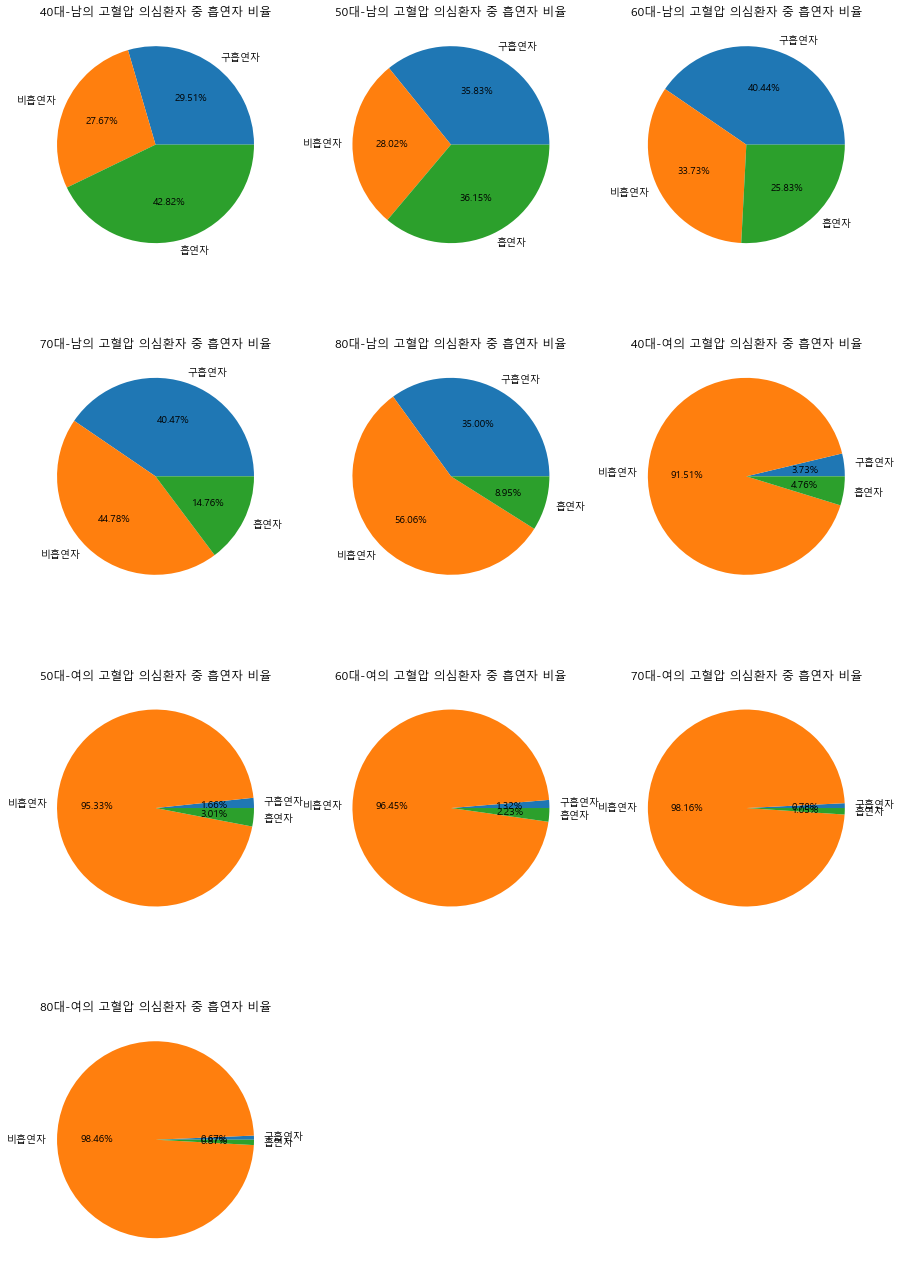

In [22]:
index = df[df['혈압']=='정상'].index
df.drop(index, inplace=True)
index = df[df['혈압']=='저혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 고혈압 의심환자 중 흡연자 비율')
    j += 1

plt.show()

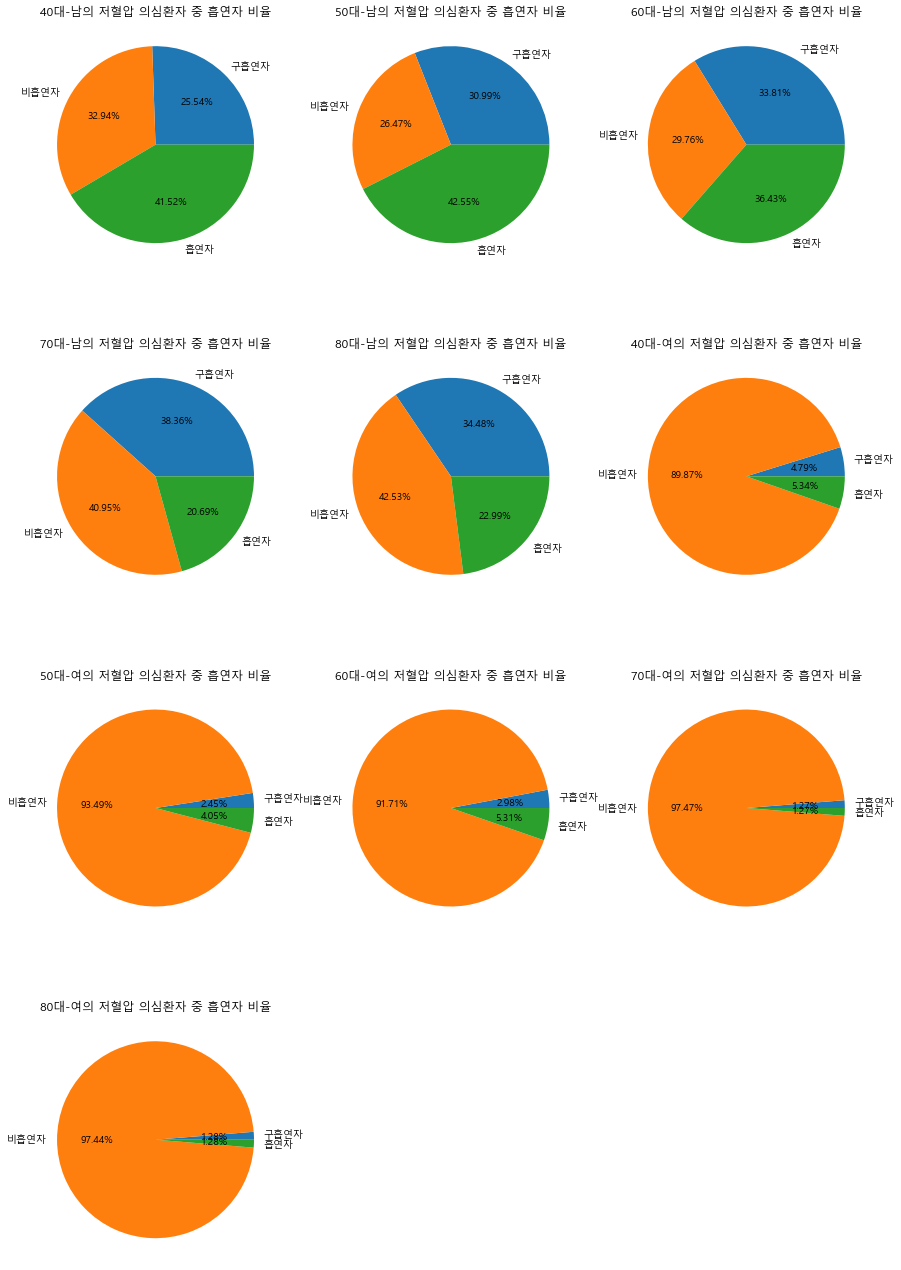

In [23]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "혈압"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['혈압']!='저혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 저혈압 의심환자 중 흡연자 비율')
    j += 1

plt.show()

## 흡연상태에 따른 간장질환 여부

In [24]:
df = 검진정보.groupby(["흡연상태","성별","연령대", "혈청크레아티닌유무"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["간장질환"] = df["혈청크레아티닌유무"]
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,흡연상태,성별,연령대,혈청크레아티닌유무,빈혈유무,BMI,비만정도,혈압,당뇨,신장질환,간질환,사람수,간장질환,성별-연령대
0,구흡연자,남,40대,비정상,5486,5486,5486,5486,5486,5486,5486,5486,비정상,40대-남
1,구흡연자,남,40대,정상,43969,43969,43969,43969,43968,43969,43969,43969,정상,40대-남
2,구흡연자,남,50대,비정상,7120,7120,7120,7120,7119,7120,7120,7120,비정상,50대-남
3,구흡연자,남,50대,정상,50425,50425,50425,50425,50424,50425,50425,50425,정상,50대-남
4,구흡연자,남,60대,비정상,7160,7160,7160,7160,7160,7160,7160,7160,비정상,60대-남
5,구흡연자,남,60대,정상,40116,40116,40116,40116,40114,40116,40116,40116,정상,60대-남
6,구흡연자,남,70대,비정상,4419,4419,4419,4419,4419,4419,4419,4419,비정상,70대-남
7,구흡연자,남,70대,정상,16809,16809,16809,16809,16809,16809,16809,16809,정상,70대-남
8,구흡연자,남,80대,비정상,1334,1334,1334,1334,1334,1334,1334,1334,비정상,80대-남
9,구흡연자,남,80대,정상,3131,3131,3131,3131,3131,3131,3131,3131,정상,80대-남


In [25]:
# 흡연상태 - 간장질환여부
# 간장질환여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('흡연상태:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

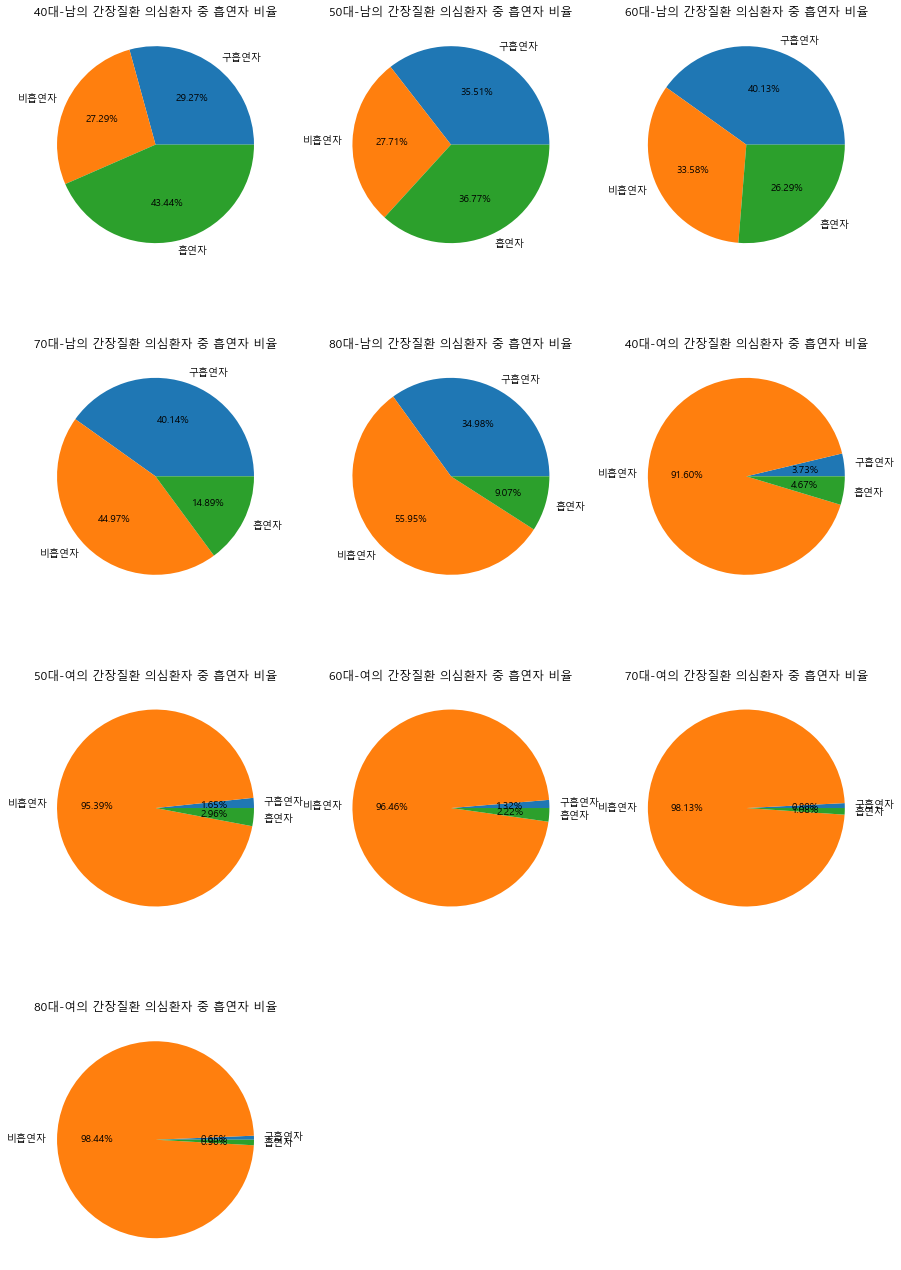

In [26]:
index = df[df['간장질환']!='정상'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['흡연상태'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    plt.pie(x,labels=labels, autopct='%.2f%%')    
    plt.title(i+'의 간장질환 의심환자 중 흡연자 비율')
    j += 1

plt.show()